# Proyecto Final Analítica de Datos

#### Juan Diego Carvajal Castaño - A00135764
#### Juan Manuel Imbachí Güengue - A00130580

Importamos las librerías que vamos a usar

In [2]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
import seaborn as sns

In [3]:
data = pd.read_csv('2017-18_NBA_salary.csv')

## 1. Limpieza y EDA

El objetivo de esta sección es evaluar la calidad de los datos y tener un entendimiento inicial de la relación entre las variables predictivas y la variable objetivo.

In [4]:
data.shape

(485, 28)

In [5]:
data.head()

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


Hay 485 registros con 28 variables.
Ahora analizaremos si hay problemas de datos con respecto a valores faltantes y outliers.

In [6]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Player,485,483,Kay Felder,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,485,NaN,NaN,NaN,6.63651e+06,7.3926e+06,46080,1.47138e+06,3.20222e+06,1e+07,3.46826e+07
NBA_Country,485,44,USA,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NBA_DraftNumber,485,NaN,NaN,NaN,29.4515,21.1258,1,11,25,47,62
Age,485,NaN,NaN,NaN,26.2639,4.2723,19,23,26,29,41
Tm,485,31,TOT,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,485,NaN,NaN,NaN,50.167,24.8749,1,29,59,71,79
MP,485,NaN,NaN,NaN,1154.14,811.357,1,381,1134,1819,2898
PER,485,NaN,NaN,NaN,13.2608,8.76928,-41.1,9.8,13.2,16.5,134.1
TS%,483,NaN,NaN,NaN,0.535387,0.112352,0,0.5055,0.545,0.5825,1.5


Aparentemente no hay outliers, sin embargo, se puede observar que hay valores faltantes, puesto que el valor de la columna COUNT no es 485 para todas las variables.

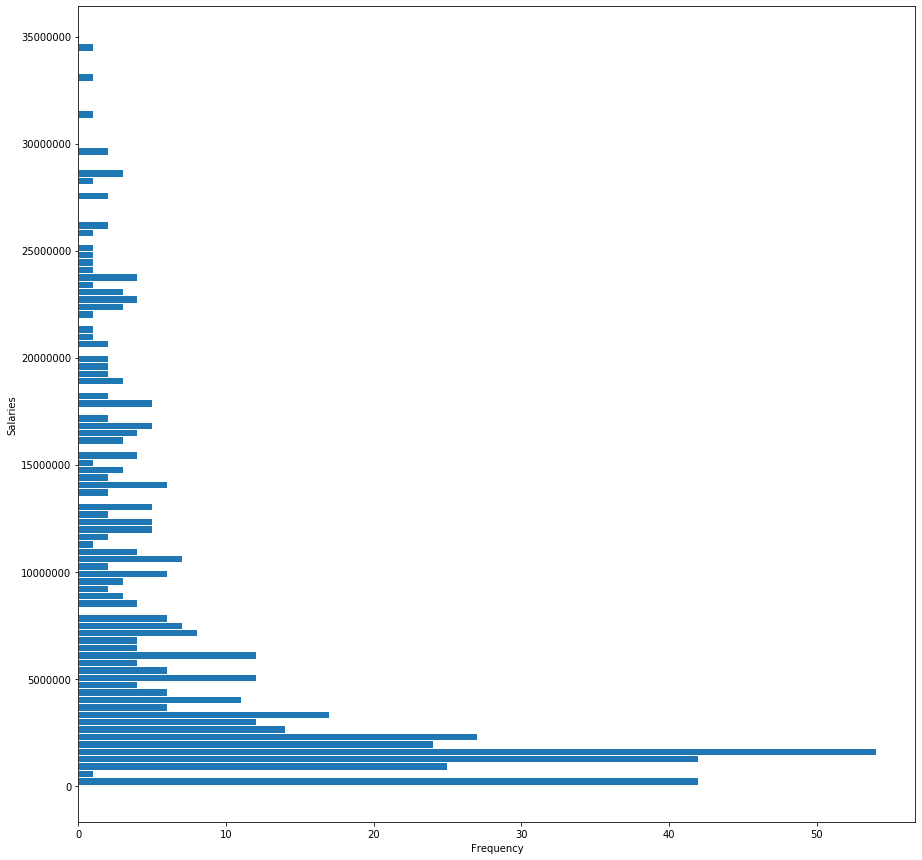

In [7]:
ax = data['Salary'].plot.hist(bins=100, orientation='horizontal', figsize = (15,15), edgecolor='white') 
ax.set_ylabel('Salaries') 
ax.ticklabel_format(useOffset=False, style='plain', axis='y')

Como se puede observar en el histograma, los valores de la variable objetivo no están distribuidos simétricamente pues no vemos una distribución en forma de campana de Gauss.

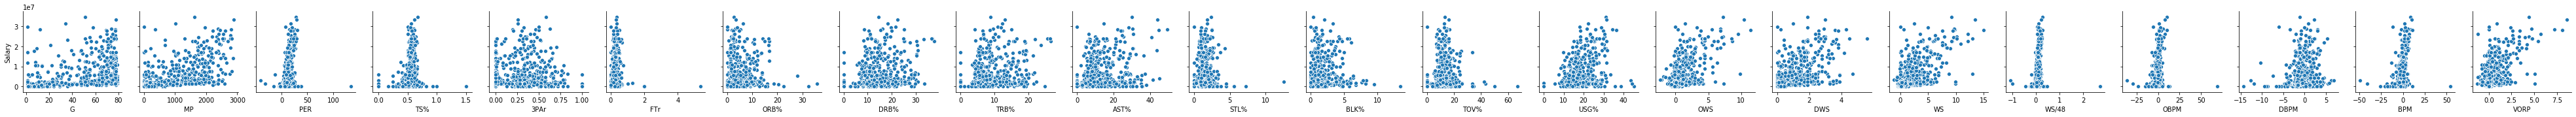

In [8]:
import seaborn as sns
pp = sns.pairplot(data=data,
                  y_vars=['Salary'],
                  x_vars=data.columns[6:])

Con estos diagramas podemos ver la relación existente entre la variable dependiente y las variables independientes, si se observa con atención las variables independientes numéricas, podemos observar si existe una tendencia o correlación entre ella y la variable objetivo, esto puede darnos una idea de que tan bien podría explicar el comportamiento de Y.

### Variables que tienen valores faltantes


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 28 columns):
Player             485 non-null object
Salary             485 non-null int64
NBA_Country        485 non-null object
NBA_DraftNumber    485 non-null int64
Age                485 non-null int64
Tm                 485 non-null object
G                  485 non-null int64
MP                 485 non-null int64
PER                485 non-null float64
TS%                483 non-null float64
3PAr               483 non-null float64
FTr                483 non-null float64
ORB%               485 non-null float64
DRB%               485 non-null float64
TRB%               485 non-null float64
AST%               485 non-null float64
STL%               485 non-null float64
BLK%               485 non-null float64
TOV%               483 non-null float64
USG%               485 non-null float64
OWS                485 non-null float64
DWS                485 non-null float64
WS                 485 non-n

In [10]:
print(pd.isnull(data).any(0)) #el 0 implica cualquier columna, si quisieramos las filas utilizamos 1
print("Las columnas que tienen valores faltantes son: ",pd.isnull(data).any(0).to_numpy().nonzero()[0])
print("y corresponden a: ", data.columns[pd.isnull(data).any(0).to_numpy().nonzero()[0]])

Player             False
Salary             False
NBA_Country        False
NBA_DraftNumber    False
Age                False
Tm                 False
G                  False
MP                 False
PER                False
TS%                 True
3PAr                True
FTr                 True
ORB%               False
DRB%               False
TRB%               False
AST%               False
STL%               False
BLK%               False
TOV%                True
USG%               False
OWS                False
DWS                False
WS                 False
WS/48              False
OBPM               False
DBPM               False
BPM                False
VORP               False
dtype: bool
Las columnas que tienen valores faltantes son:  [ 9 10 11 18]
y corresponden a:  Index(['TS%', '3PAr', 'FTr', 'TOV%'], dtype='object')


#### Las columnas TS%, 3PAr, FTr, TOV% tienen valores faltantes. 

### Registros repetidos

In [11]:
data['Player'].value_counts()

Kay Felder                 3
Domantas Sabonis           1
Bruno Caboclo              1
Troy Williams              1
Tobias Harris              1
Lucas Nogueira             1
Quincy Acy                 1
Mike James                 1
Tyler Lydon                1
Denzel Valentine           1
Kevon Looney               1
Tyreke Evans               1
Antonius Cleveland         1
Bojan Bogdanovic           1
Langston Galloway          1
Rodney McGruder            1
Shabazz Muhammad           1
Mario Hezonja              1
Damian Jones               1
Andre Roberson             1
Zaza Pachulia              1
Rodney Purvis              1
Trevor Booker              1
Abdel Nader                1
James Harden               1
Danilo Gallinari           1
Bryn Forbes                1
Giannis Antetokounmpo      1
Jameer Nelson              1
Dwayne Bacon               1
                          ..
Jakob Poeltl               1
Tim Frazier                1
Dion Waiters               1
Joe Johnson   

In [12]:
data[data['Player'].duplicated(keep=False)]

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
224,Kay Felder,1312611,USA,54,22,DET,1,3,-31.6,0.000,...,33.3,44.2,-0.1,0.0,-0.1,-1.005,-29.5,-11.9,-41.4,0.0
225,Kay Felder,1312611,USA,54,22,CHI,14,134,3.6,0.386,...,17.4,28.0,-0.5,0.1,-0.5,-0.166,-8.2,-3.3,-11.5,-0.3
226,Kay Felder,1312611,USA,54,22,TOT,15,137,2.9,0.375,...,17.9,28.4,-0.6,0.1,-0.5,-0.185,-8.7,-3.5,-12.1,-0.3


#### Se encontró que el jugador Kay Felder tiene 3 registros asociados a 3 equipos diferentes durante la temporada

# Valores atípicos

Mediante diagramas de cajas y bigotes visualizamos la distribución de las variables predictoras, para así identificar los posibles valores atípicos. 

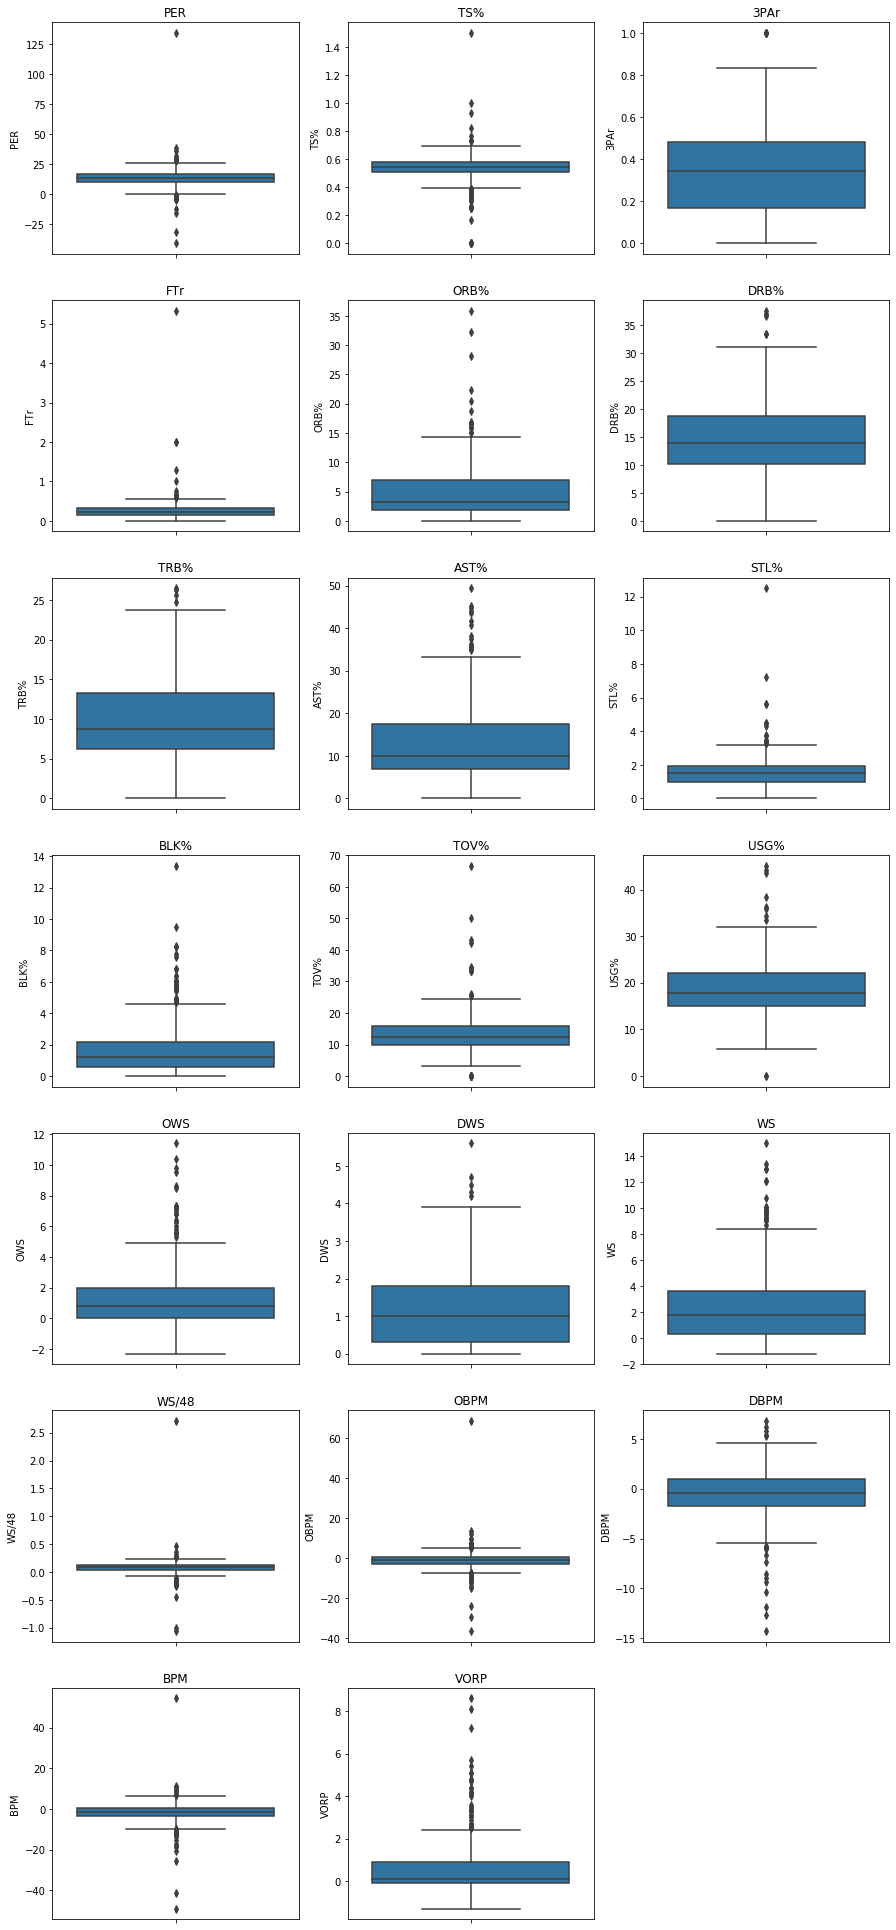

In [13]:
fig = plt.figure(figsize=(15,40))
i=1

for var_num in data.columns[8:]:
    ax = fig.add_subplot(8, 3, i) #Defino una tabla de 2 filas por 2 columnas, agrego el i-ésimo plot
    sns.boxplot(y=var_num, data=data)
    plt.title(var_num)
    i+=1

# Reporte Primera Entrega

## Calidad de los Datos

Al observar los datos se pudo evidenciar que:
### Faltantes
   Existen datos faltantes para 4 variables: TS%, 3PAr, FTr, TOV%, donde cada una tiene 2 valores nulos o NaN.
### Atípicos
* **PER**
	Se evidencia un dato atípico con valor de 134.1 , el cual se encuentre bastante alejado de su valor inmediatamente anterior que es de 38.1, por lo tanto se debe eliminar en la siguiente fase de la preparación de los datos.
    
    #### [-] Registro: 142.

     Existen 2 datos negativos sospechosos con valores de -41.1 y -31.6, se deben evaluar más adelante y definir si se eliminarán o no.

	#### [-] Registros: 147, 224.


* **TS%**
	Hay un dato atípico de 1.5, se procederá a eliminarlo debido a que está bastante alejado del registro anterior, el cual tiene valor de 1.0.
    
	#### [-] Registro: 142.


* **FTr**
	Existe un valor atípico de 5.3, el cual está bastante alejado del registro anterior, el cual tiene valor de 2.0.
	 Se debe eliminar el dato para que no afecte el modelo en proceso de entrenamiento.
	
	Hay 2 registros con valores de 2.0, se consideran sospechosos y se definirá más adelante si borrarlos o no.

	#### [-] Registro: 165, 396, 84.


* **ORB%**
	Existen 3 valores atípicos 35.9, 32.3 y 28.1. Sin embargo, no serán eliminados pues no están tan lejos ni tan aislados de los demás datos.
	
	#### [-] Registros: 224, 19, 239.
    

* **STL%**
	Se eliminarán el valor atípicos más extremo, correspondiente a 12.5
	
	#### [-] Registros: 231.


* **BLK%**
	Se eliminará el valor atípico más extremo, correspondiente a 13.4
	 
	#### [-] Registros: 19.


* **TOV%**
	
	Se eliminará el valor atípico más extremo, correspondiente a 66.7
	 
	#### [-] Registros: 188.
    

* **WS/48**
	Se eliminará el valor atípico más extremo, correspondientes a 2.713. Los valores atípicos -1.005 y -1.063 se evaluarán más adelante.
	 
	#### [-] Registros: 142, 147, 224.
    

* **OBPM**
	Se eliminará el valor atípico más extremo correspondiente a 68.7.
	 
	#### [-] Registros: 142.
    

* **BPM**
	Se eliminarán los valores atípicos más extremos, tantos positivos como negativos, correspondientes a 54.4, -41.4 y -49.2
	 
	#### [-] Registros: 142, 147, 224.

**Registros a eliminar**

19,142,147,165,188,224,231

**Total: 7**
### Repetidos
   Usando el atributo 'Player' como identificador del registro, se encontró que hay 3 registros repetidos con el valor'Kay Felder', aunque sabemos que es inusual que un jugador sea transferido más de una vez dentro de una misma temporada, dado que es posible realizar dicha transferencia, tomaremos estos 3 registros en el análisis.


### Problemas de escala  
* En el caso de los porcentajes, las variables varían en el orden de magnitud, unas presentan un orden de 10^0 y otras de 10^-1.
* Las variables presentan diferencias significativas en sus promedios, valores mínimos y máximos.
    
   Estos problemas de escala pueden ser consecuencia de valores atípicos que están presentes en los datos.

### Problemas de tipo
* Las características 'NBA_Country', 'Tm' y 'Player' son las únicas de tipo string, por lo que deberían ser convertidas a variables numéricas para ser tomadas en cuenta en el estudio. Sin embargo, consideramos que 'Player' no es relevante para hacer inferencias sobre el posible salario de un jugador.
    
### Distribución de los datos
* Los valores de los percentiles para cada variable varía significativamente, lo que podría indicar sesgos dentro de la distribución.

## Limpieza de los datos

### Eliminación de registros con valores faltantes

In [14]:
cleanData = data.dropna()
print("Datos originales: ", data.shape)
print("Datos completos: ", cleanData.shape)
print("Se eliminaron {} registos".format(data.shape[0] - cleanData.shape[0]))

Datos originales:  (485, 28)
Datos completos:  (483, 28)
Se eliminaron 2 registos


### Eliminación de registros con valores atípicos

In [15]:
data = cleanData.drop([19,142,147,165,188,224,231],axis=0)
print("Datos resultantes: ", data.shape)
print("Se eliminaron {} registos".format(cleanData.shape[0] - data.shape[0]))

Datos resultantes:  (476, 28)
Se eliminaron 7 registos


### Revisión de datos atípicos nuevo Dataset

Text(0.5, 1.0, 'PER')

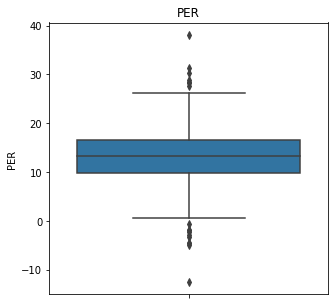

In [16]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['PER'], data=data)
plt.title('PER')

Para la columna PER aún se encuentran valores atípicos, sin embargo, estan relativamente cerca a los límites y tienen sentido para el dominio de la variable, por lo tanto no se eliminarán.

Text(0.5, 1.0, 'TS%')

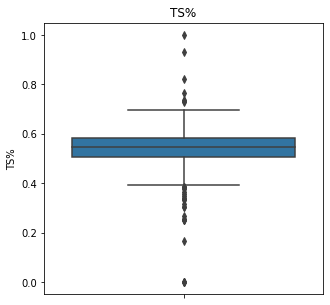

In [17]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['TS%'], data=data)
plt.title('TS%')

Para la columna TS% aún se encuentran valores atípicos, sin embargo, estan relativamente cerca a los límites y tienen sentido para el dominio de la variable, por lo tanto no se eliminarán.

Text(0.5, 1.0, 'FTr')

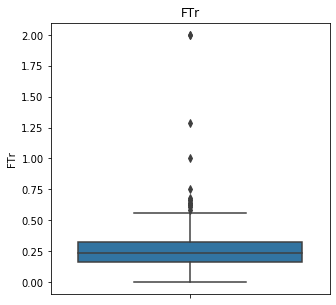

In [18]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['FTr'], data=data)
plt.title('FTr')

Para la columna FTr aún se encuentran valores atípicos, así que se eliminarán los registros asociados más extremos.

In [19]:
cleanData = data[(data['FTr'] < 1.7)]
print("Datos resultantes: ", cleanData.shape)
print("Se eliminaron {} registos".format(data.shape[0] - cleanData.shape[0]))

Datos resultantes:  (474, 28)
Se eliminaron 2 registos


Text(0.5, 1.0, 'FTr')

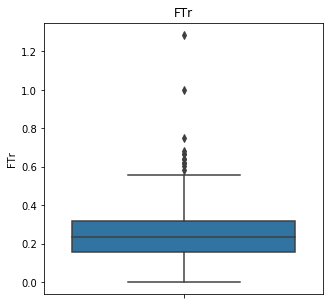

In [20]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=cleanData['FTr'], data=cleanData)
plt.title('FTr')

Aún se siguen viendo valores atípicos, sin embargo, son relativamente cercanos a los límites y no provocan que la caja se aplane. Por lo tanto se conservaron.

In [21]:
data = cleanData

Text(0.5, 1.0, 'STL%')

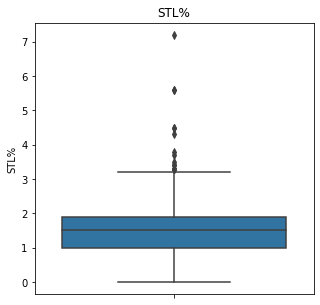

In [22]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['STL%'], data=data)
plt.title('STL%')

Aún se siguen viendo valores atípicos, sin embargo, son relativamente cercanos a los límites y no provocan que la caja se aplane. Por lo tanto se conservaron.

Text(0.5, 1.0, 'BLK%')

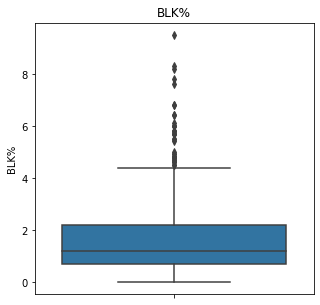

In [23]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['BLK%'], data=data)
plt.title('BLK%')

Aún se siguen viendo valores atípicos, sin embargo, son relativamente cercanos a los límites y no provocan que la caja se aplane. Por lo tanto se conservaron.

Text(0.5, 1.0, 'TOV%')

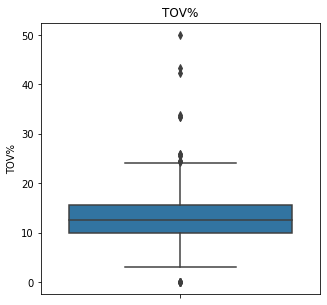

In [24]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['TOV%'], data=data)
plt.title('TOV%')

Aún se siguen viendo valores atípicos, sin embargo, son relativamente cercanos a los límites y no provocan que la caja se aplane. Por lo tanto se conservaron.

Text(0.5, 1.0, 'WS/48')

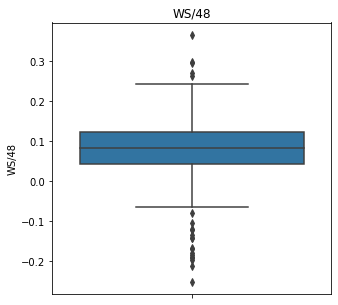

In [25]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['WS/48'], data=data)
plt.title('WS/48')

Aún se siguen viendo valores atípicos, sin embargo, son relativamente cercanos a los límites y no provocan que la caja se aplane. Por lo tanto se conservaron.

Text(0.5, 1.0, 'OBPM')

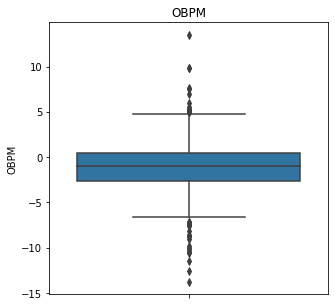

In [26]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['OBPM'], data=data)
plt.title('OBPM')

Aún se siguen viendo valores atípicos, sin embargo, son relativamente cercanos a los límites y no provocan que la caja se aplane. Por lo tanto se conservaron.

Text(0.5, 1.0, 'BPM')

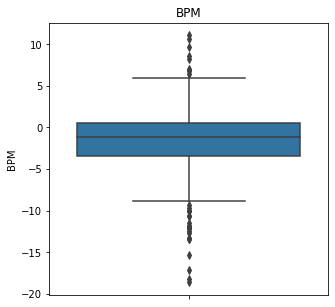

In [27]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y=data['BPM'], data=data)
plt.title('BPM')

Aún se siguen viendo valores atípicos, sin embargo, son relativamente cercanos a los límites y no provocan que la caja se aplane. Por lo tanto se conservaron.

### Normalización de los datos

Para normalizar los datos, se usará el Standard Scaler al momento de particionar el dataset de acuerdo con el protocolo de evaluación.

### Discretización de variables categóricas

In [28]:
data['NBA_Country2'] = data.NBA_Country.factorize()[0]
data['Tm2'] = data.Tm.factorize()[0]
data.head(5)

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,NBA_Country2,Tm2
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,...,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2,0,0
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7,1,1
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0,2,2
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1,2,3
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,...,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2,2,4


## Modelos Predictivos

### Modelo de Referencia (Baseline)

### Variables independientes y objetivo

In [29]:
x = data.iloc[:,2:].drop(columns = ['NBA_Country', 'Tm'])
y = data.iloc[:,1:2]
print(x.shape)
print(y.shape)

(474, 26)
(474, 1)


### 1. Regresión Lineal

#### Protocolo de Evaluación

In [30]:
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn import datasets, linear_model #datasets y modelos de aprendizaje automático (ML)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats #para poder hacer cálculos científicos --> valores p
import statsmodels.api as sm
from math import sqrt

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=12345)

In [32]:
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_train: ",y_test.shape)

x_train:  (331, 26)
x_test:  (143, 26)
y_train:  (331, 1)
y_train:  (143, 1)


#### 1.0. Predicción baseline

In [32]:
y_pred = np.full(x_test.shape[0], np.mean(data.Salary))
print("MSE:", mean_squared_error(y_test, y_pred), ", R2:", r2_score(y_test, y_pred))

r2_aj = 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)
print('\nR2 adj: %.4f' %r2_aj)

MSE: 52196848600524.48 , R2: -0.0013460163761327415

R2 adj: -0.2258


#### 1.1. Predicción usando todas las variables

In [33]:
linear_reg = linear_model.LinearRegression(normalize=True)
linear_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [34]:
y_train_pred = linear_reg.predict(x_train)
y_test_pred = linear_reg.predict(x_test)
print(y_train_pred.shape)
print(y_test_pred.shape)

(331, 1)
(143, 1)


##### 1.1.1. Métricas

In [35]:
print("MSE (train): %.4f" % mean_squared_error(y_train, y_train_pred))
print("MSE (test) : %.4f" % mean_squared_error(y_test, y_test_pred))
print('R2  (train): %.4f' % r2_score(y_train, y_train_pred))
print('R2  (test) : %.4f' % r2_score(y_test, y_test_pred))

MSE (train): 24078857339843.3125
MSE (test) : 28729153976646.1680
R2  (train): 0.5712
R2  (test) : 0.4489


In [36]:
r2_aj_train = 1 - (1-r2_score(y_train, y_train_pred))*(len(y_train)-1) / (len(y_train) - x_train.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

R2 adj (train): 0.5345
R2 adj (test): 0.3253


#### 1.1.2. Análisis de los coeficientes

In [37]:
x2_train = sm.add_constant(x_train)
print(x2_train.head())

     const  NBA_DraftNumber  Age   G    MP   PER    TS%   3PAr    FTr  ORB%  \
3      1.0               13   22  24   656  14.6  0.499  0.346  0.301   1.4   
228    1.0                1   22  78  2770  24.8  0.645  0.249  0.351   9.3   
301    1.0                9   22  78  1429  17.0  0.648  0.006  0.272  12.4   
286    1.0               22   34  58  1483  11.2  0.487  0.193  0.167   1.5   
399    1.0               27   29  19   141   8.4  0.559  0.489  0.064   2.4   

     ...  OWS  DWS    WS  WS/48  OBPM  DBPM  BPM  VORP  NBA_Country2  Tm2  
3    ... -0.1  0.5   0.4  0.027  -0.7  -2.0 -2.6  -0.1             2    3  
228  ...  9.8  3.1  13.0  0.225   4.3   1.0  5.3   5.1             2   15  
301  ...  2.9  2.2   5.1  0.170   0.3   2.9  3.2   1.9            34   30  
286  ...  0.3  0.7   1.0  0.032  -2.0  -1.6 -3.6  -0.6             2   19  
399  ... -0.2  0.1   0.0 -0.012  -3.5  -1.1 -4.6  -0.1             2    8  

[5 rows x 27 columns]


C:\Users\juand\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [38]:
modeloStats = sm.OLS(y_train, x2_train)
results = modeloStats.fit();
#Consultamos la calidad del modelo a partir de sus estadísticas
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     15.57
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           8.52e-42
Time:                        00:18:23   Log-Likelihood:                -5569.1
No. Observations:                 331   AIC:                         1.119e+04
Df Residuals:                     304   BIC:                         1.129e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.616e+06   7.16e+06      0.644      0.520   -9.48e+06    1.87e+07
NBA_DraftNumber -6.471e+04   1.63e+04     -3.982      0.000   -9.67e+04   -3.27e+04
Age              6.163e+05   7.06e+04      8.724      0.000    4.77e+05    7.55e+05
G               -1.805e+05    3.1e+04     -5.828      0.000   -2.41e+05    -1.2e+05
MP               6651.9938   1418.699      4.689      0.000    3860.281    9443.706
PER             -5.214e+05   4.26e+05     -1.223      0.222   -1.36e+06    3.18e+05
TS%             -1.797e+07    9.9e+06     -1.815      0.071   -3.75e+07    1.51e+06
3PAr            -4.964e+06   3.21e+06     -1.545      0.123   -1.13e+07    1.36e+06
FTr              6.611e+05   2.91e+06      0.227      0.820   -5.06e+06    6.38e+06
ORB%            -1.952e+05   1.11e+06     -0.175      0.861   -2.39e+06       2e+06
DRB%             2.774e+05   1.14e+06      0.244      0.808   -1.96e+06    2.52e+06
TRB%            -1.604e+05   2.25e+06     -0.071      0.943   -4.59e+06    4.26e+06
AST%            -1.788e+05   7.29e+04     -2.455      0.015   -3.22e+05   -3.55e+04
STL%            -5.573e+04   5.93e+05     -0.094      0.925   -1.22e+06    1.11e+06
BLK%             1.405e+05   4.01e+05      0.350      0.726   -6.49e+05     9.3e+05
TOV%             1.844e+05   1.11e+05      1.659      0.098   -3.43e+04    4.03e+05
USG%             2.127e+05   1.64e+05      1.296      0.196    -1.1e+05    5.36e+05
OWS               5.33e+06    5.5e+06      0.969      0.334    -5.5e+06    1.62e+07
DWS              5.207e+06    5.5e+06      0.947      0.344   -5.61e+06     1.6e+07
WS              -5.564e+06   5.49e+06     -1.014      0.311   -1.64e+07    5.23e+06
WS/48            3.209e+07   2.33e+07      1.379      0.169   -1.37e+07    7.79e+07
OBPM             5.305e+06      6e+06      0.884      0.377    -6.5e+06    1.71e+07
DBPM              4.08e+06   5.91e+06      0.691      0.490   -7.54e+06    1.57e+07
BPM              -4.33e+06   5.93e+06     -0.731      0.465    -1.6e+07    7.33e+06
VORP             1.466e+06   8.06e+05      1.818      0.070    -1.2e+05    3.05e+06
NBA_Country2    -3362.0581   3.37e+04     -0.100      0.921   -6.96e+04    6.29e+04
Tm2              1.309e+04    3.3e+04      0.397      0.692   -5.18e+04     7.8e+04
==============================================================================
Omnibus:                       27.306   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.085
Skew:                           0.531   Prob(JB):                     2.67e-10
Kurtosis:                       4.438   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

Como puede verse en el resultado de las pruebas de hipótesis los coeficientes que son significativos para el modelo son:
NBA_DraftNumber, Age, G, MP, AST%.

También es posible que haya problemas de multicolinealidad como lo especifica la advertencia #2. A continuación construiremos una matriz de correlación para dar mayor claridad sobre la relación entre las variables.

In [41]:
# Calculamos la matriz de correlaciones
corr_matrix = x_train.join(y_train).corr()
corr_matrix

,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,NBA_Country2,Tm2,Salary
NBA_DraftNumber,1.000000,0.027979,-0.282847,-0.346984,-0.366332,-0.164489,0.223567,-0.088247,-0.086241,-0.176484,...,-0.323039,-0.324691,-0.272885,-0.311156,-0.144516,-0.313881,-0.269370,0.046761,0.010675,-0.349851
Age,0.027979,1.000000,0.093667,0.116491,0.101049,0.090524,0.012019,-0.005010,0.007495,0.012696,...,0.103481,0.155976,0.116450,0.139185,0.009553,0.110655,0.129026,-0.021452,-0.075753,0.396991
G,-0.282847,0.093667,1.000000,0.862070,0.384300,0.350116,-0.050334,0.041416,-0.071499,0.116889,...,0.715296,0.609628,0.433377,0.524234,0.363787,0.597482,0.399211,0.046334,0.026233,0.236444
MP,-0.346984,0.116491,0.862070,1.000000,0.480185,0.312502,-0.027325,0.050476,-0.121408,0.088846,...,0.827779,0.770320,0.420969,0.622569,0.288868,0.631052,0.622455,0.015245,0.010725,0.474630
PER,-0.366332,0.101049,0.384300,0.480185,1.000000,0.698256,-0.458469,0.436331,0.295666,0.399348,...,0.547306,0.687396,0.879845,0.823685,0.289361,0.783842,0.627185,0.120323,0.033889,0.430147
TS%,-0.164489,0.090524,0.350116,0.312502,0.698256,1.000000,-0.267145,0.293733,0.186795,0.131359,...,0.307520,0.407011,0.772303,0.715744,0.128692,0.614508,0.316493,0.075709,0.072167,0.199065
3PAr,0.223567,0.012019,-0.050334,-0.027325,-0.458469,-0.267145,1.000000,-0.487637,-0.649981,-0.406625,...,-0.165107,-0.177394,-0.356335,-0.039190,-0.311530,-0.200303,-0.117409,-0.089969,-0.028918,-0.082234
FTr,-0.088247,-0.005010,0.041416,0.050476,0.436331,0.293733,-0.487637,1.000000,0.376237,0.374880,...,0.175601,0.253749,0.431972,0.174290,0.275865,0.283443,0.227880,0.078293,0.081604,0.148761
ORB%,-0.086241,0.007495,-0.071499,-0.121408,0.295666,0.186795,-0.649981,0.376237,1.000000,0.516542,...,0.078804,0.128061,0.298359,-0.043829,0.218056,0.086198,0.091348,0.152930,0.008741,0.010086
DRB%,-0.176484,0.012696,0.116889,0.088846,0.399348,0.131359,-0.406625,0.374880,0.516542,1.000000,...,0.330343,0.301070,0.355371,0.011491,0.468630,0.264630,0.263941,0.229703,-0.025278,0.189913


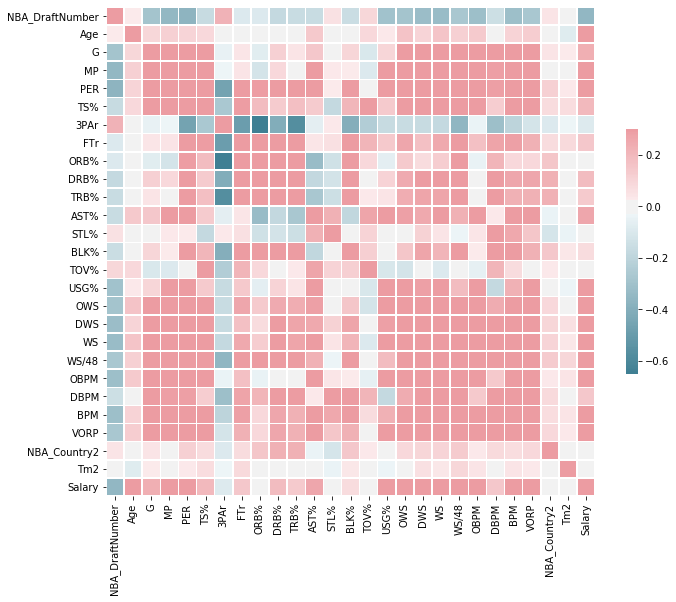

In [42]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Como se puede observar, la variable 3PAr esta fuertemente correlacionada con las variables independientes FTr, ORB%, DRB% y TRB%, por lo que es recomendable eliminarlas al momento de construir el modelo. Sin embargo, se realizará un proceso de selección de variables por medio de forward stepwise.

#### 1.1.3. Selección de variables

In [43]:
corr_matrix['Salary'].sort_values(ascending=False)

Salary             1.000000
VORP               0.561972
WS                 0.554719
OWS                0.528523
DWS                0.474727
MP                 0.474630
OBPM               0.436432
PER                0.430147
BPM                0.413073
Age                0.396991
WS/48              0.352352
USG%               0.352269
AST%               0.265646
G                  0.236444
TS%                0.199065
DRB%               0.189913
DBPM               0.150196
FTr                0.148761
TRB%               0.139816
BLK%               0.075643
NBA_Country2       0.013785
ORB%               0.010086
STL%               0.003143
Tm2               -0.004918
TOV%              -0.022240
3PAr              -0.082234
NBA_DraftNumber   -0.349851
Name: Salary, dtype: float64

##### 1.1.3.1. Forward Stepwise

In [44]:
variables = corr_matrix['Salary'].sort_values(ascending=False).index[1:].values
variables

array(['VORP', 'WS', 'OWS', 'DWS', 'MP', 'OBPM', 'PER', 'BPM', 'Age',
       'WS/48', 'USG%', 'AST%', 'G', 'TS%', 'DRB%', 'DBPM', 'FTr', 'TRB%',
       'BLK%', 'NBA_Country2', 'ORB%', 'STL%', 'Tm2', 'TOV%', '3PAr',
       'NBA_DraftNumber'], dtype=object)

In [45]:
import sys
current_variables_forward = np.array([])
max_r2 = -sys.maxsize - 1

while(variables.size > 0):
    max_r2_temp = -sys.maxsize - 1
    max_r2_index = -1
    for j in range(variables.size): 
        
        test_variables = np.copy(current_variables_forward)
        #test_variables.append(variables[j])
        new_test_variable=[variables[j]]
        test_variables = np.concatenate((test_variables, new_test_variable), axis=0)
        x2_train = x_train[test_variables]
        x2_train = sm.add_constant(x2_train)
        modeloStats = sm.OLS(y_train, x2_train)
        results = modeloStats.fit();
        
        if results.rsquared_adj > max_r2_temp:
            max_r2_temp = results.rsquared_adj
            max_r2_index = j
            
        #print('R2_temp adj: %.4f' %results.rsquared_adj,test_variables)
        
    if max_r2 < max_r2_temp:
        max_r2 = max_r2_temp
        new_current_variable=[variables[max_r2_index]]
        current_variables_forward = np.concatenate((current_variables_forward, new_current_variable), axis=0)
        variables = np.delete(variables, max_r2_index)
    else:
        break
        
    print('\nR2 adj: %.4f' %max_r2,current_variables_forward)

print("\n\nSelected variables:",current_variables_forward)

F:\icesi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



R2 adj: 0.3137 ['VORP']

R2 adj: 0.4194 ['VORP' 'Age']

R2 adj: 0.4701 ['VORP' 'Age' 'NBA_DraftNumber']

R2 adj: 0.4821 ['VORP' 'Age' 'NBA_DraftNumber' 'USG%']

R2 adj: 0.4875 ['VORP' 'Age' 'NBA_DraftNumber' 'USG%' 'MP']

R2 adj: 0.5334 ['VORP' 'Age' 'NBA_DraftNumber' 'USG%' 'MP' 'G']

R2 adj: 0.5391 ['VORP' 'Age' 'NBA_DraftNumber' 'USG%' 'MP' 'G' 'DRB%']

R2 adj: 0.5402 ['VORP' 'Age' 'NBA_DraftNumber' 'USG%' 'MP' 'G' 'DRB%' 'WS/48']

R2 adj: 0.5440 ['VORP' 'Age' 'NBA_DraftNumber' 'USG%' 'MP' 'G' 'DRB%' 'WS/48' 'PER']

R2 adj: 0.5441 ['VORP' 'Age' 'NBA_DraftNumber' 'USG%' 'MP' 'G' 'DRB%' 'WS/48' 'PER' 'DWS']


Selected variables: ['VORP' 'Age' 'NBA_DraftNumber' 'USG%' 'MP' 'G' 'DRB%' 'WS/48' 'PER' 'DWS']


#### 1.1.3.2. Backward Stepwise

In [46]:
variables = corr_matrix['Salary'].sort_values(ascending=False).index[1:].values
variables

array(['VORP', 'WS', 'OWS', 'DWS', 'MP', 'OBPM', 'PER', 'BPM', 'Age',
       'WS/48', 'USG%', 'AST%', 'G', 'TS%', 'DRB%', 'DBPM', 'FTr', 'TRB%',
       'BLK%', 'NBA_Country2', 'ORB%', 'STL%', 'Tm2', 'TOV%', '3PAr',
       'NBA_DraftNumber'], dtype=object)

In [47]:
current_variables_backward = np.copy(variables)
max_r2 = -sys.maxsize - 1

while(variables.size > 0):
    max_r2_temp = -sys.maxsize - 1
    max_r2_index = -1
    for j in range(variables.size): 
        
        test_variables = np.copy(current_variables_backward)
        #test_variables.append(variables[j])
        test_variables = np.delete(test_variables, j)
        x2_train = x_train[test_variables]
        x2_train = sm.add_constant(x2_train)
        modeloStats = sm.OLS(y_train, x2_train)
        results = modeloStats.fit();
        
        if results.rsquared_adj > max_r2_temp:
            max_r2_temp = results.rsquared_adj
            max_r2_index = j
            
        #print('R2_temp adj: %.4f' %results.rsquared_adj,test_variables)
        
    if max_r2 < max_r2_temp:
        max_r2 = max_r2_temp
        current_variables_backward = np.delete(current_variables_backward, max_r2_index)
        variables = np.delete(variables, max_r2_index)
    else:
        break
        
    print('\nR2 adj: %.4f' %max_r2,current_variables_backward)    

print("\n\nSelected variables:",current_variables_backward)


R2 adj: 0.5360 ['VORP' 'WS' 'OWS' 'DWS' 'MP' 'OBPM' 'PER' 'BPM' 'Age' 'WS/48' 'USG%'
 'AST%' 'G' 'TS%' 'DRB%' 'DBPM' 'FTr' 'BLK%' 'NBA_Country2' 'ORB%' 'STL%'
 'Tm2' 'TOV%' '3PAr' 'NBA_DraftNumber']

R2 adj: 0.5375 ['VORP' 'WS' 'OWS' 'DWS' 'MP' 'OBPM' 'PER' 'BPM' 'Age' 'WS/48' 'USG%'
 'AST%' 'G' 'TS%' 'DRB%' 'DBPM' 'FTr' 'BLK%' 'ORB%' 'STL%' 'Tm2' 'TOV%'
 '3PAr' 'NBA_DraftNumber']

R2 adj: 0.5390 ['VORP' 'WS' 'OWS' 'DWS' 'MP' 'OBPM' 'PER' 'BPM' 'Age' 'WS/48' 'USG%'
 'AST%' 'G' 'TS%' 'DRB%' 'DBPM' 'FTr' 'BLK%' 'ORB%' 'Tm2' 'TOV%' '3PAr'
 'NBA_DraftNumber']

R2 adj: 0.5404 ['VORP' 'WS' 'OWS' 'DWS' 'MP' 'OBPM' 'PER' 'BPM' 'Age' 'WS/48' 'USG%'
 'AST%' 'G' 'TS%' 'DRB%' 'DBPM' 'BLK%' 'ORB%' 'Tm2' 'TOV%' '3PAr'
 'NBA_DraftNumber']

R2 adj: 0.5417 ['VORP' 'WS' 'OWS' 'DWS' 'MP' 'OBPM' 'PER' 'BPM' 'Age' 'WS/48' 'USG%'
 'AST%' 'G' 'TS%' 'DRB%' 'DBPM' 'BLK%' 'ORB%' 'TOV%' '3PAr'
 'NBA_DraftNumber']

R2 adj: 0.5428 ['VORP' 'WS' 'OWS' 'DWS' 'MP' 'OBPM' 'PER' 'BPM' 'Age' 'WS/48' 'USG%'
 'AST%' 'G' '

#### 1.2. Predicción usando variables seleccionadas (Forward Stepwise)

In [48]:
current_variables_forward

array(['VORP', 'Age', 'NBA_DraftNumber', 'USG%', 'MP', 'G', 'DRB%',
       'WS/48', 'PER', 'DWS'], dtype='<U32')

In [47]:
x_train_filtered = x_train[current_variables_forward]
x_test_filtered = x_test[current_variables_forward]

In [48]:
linear_reg = linear_model.LinearRegression(normalize=True)
linear_reg.fit(x_train_filtered, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [49]:
y_train_filtered_pred = linear_reg.predict(x_train_filtered)
y_test_filtered_pred = linear_reg.predict(x_test_filtered)
print(y_train_filtered_pred.shape)
print(y_test_filtered_pred.shape)

(331, 1)
(143, 1)


##### 1.2.1. Métricas

In [50]:
print("MSE (train_filtered): %.4f" % mean_squared_error(y_train, y_train_filtered_pred))
print("MSE (test_filtered) : %.4f" % mean_squared_error(y_test, y_test_filtered_pred))
print('R2  (train_filtered): %.4f' % r2_score(y_train, y_train_filtered_pred))
print('R2  (test_filtered) : %.4f' % r2_score(y_test, y_test_filtered_pred))

MSE (train_filtered): 24822466638925.6211
MSE (test_filtered) : 27153913381541.7500
R2  (train_filtered): 0.5579
R2  (test_filtered) : 0.4791


In [51]:
r2_aj_train_filtered = 1 - (1-r2_score(y_train, y_train_filtered_pred))*(len(y_train)-1) / (len(y_train) - x_train_filtered.shape[1] - 1)
print('R2 adj (train_filtered): %.4f' %r2_aj_train_filtered)
r2_aj_test_filtered = 1 - (1-r2_score(y_test, y_test_filtered_pred))*(len(y_test)-1) / (len(y_test) - x_test_filtered.shape[1] - 1)
print('R2 adj (test_filtered): %.4f' %r2_aj_test_filtered)

R2 adj (train_filtered): 0.5441
R2 adj (test_filtered): 0.4396


#### 1.2. Predicción usando variables seleccionadas (Backward Stepwise)

In [52]:
current_variables_backward

array(['VORP', 'MP', 'OBPM', 'PER', 'Age', 'WS/48', 'USG%', 'AST%', 'G',
       'TS%', 'DRB%', 'ORB%', 'TOV%', '3PAr', 'NBA_DraftNumber'],
      dtype=object)

In [53]:
x_train_filtered = x_train[current_variables_backward]
x_test_filtered = x_test[current_variables_backward]

In [54]:
linear_reg = linear_model.LinearRegression(normalize=True)
linear_reg.fit(x_train_filtered, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [55]:
y_train_filtered_pred = linear_reg.predict(x_train_filtered)
y_test_filtered_pred = linear_reg.predict(x_test_filtered)
print(y_train_filtered_pred.shape)
print(y_test_filtered_pred.shape)

(331, 1)
(143, 1)


##### 1.2.1. Métricas

In [56]:
print("MSE (train_filtered): %.4f" % mean_squared_error(y_train, y_train_filtered_pred))
print("MSE (test_filtered) : %.4f" % mean_squared_error(y_test, y_test_filtered_pred))
print('R2  (train_filtered): %.4f' % r2_score(y_train, y_train_filtered_pred))
print('R2  (test_filtered) : %.4f' % r2_score(y_test, y_test_filtered_pred))

MSE (train_filtered): 24310471692470.5078
MSE (test_filtered) : 28225421746979.5312
R2  (train_filtered): 0.5671
R2  (test_filtered) : 0.4585


In [57]:
r2_aj_train_filtered = 1 - (1-r2_score(y_train, y_train_filtered_pred))*(len(y_train)-1) / (len(y_train) - x_train_filtered.shape[1] - 1)
print('R2 adj (train_filtered): %.4f' %r2_aj_train_filtered)
r2_aj_test_filtered = 1 - (1-r2_score(y_test, y_test_filtered_pred))*(len(y_test)-1) / (len(y_test) - x_test_filtered.shape[1] - 1)
print('R2 adj (test_filtered): %.4f' %r2_aj_test_filtered)

R2 adj (train_filtered): 0.5464
R2 adj (test_filtered): 0.3946


Dado que los modelos tienen diferente número de predictores, se compararán mediante el R2 ajustado.

En el primer caso, donde se usaron todas las variables independientes, el R2 ajustado para train y test fue de:

* R2 adj (train): 0.5345

* R2 adj (test): 0.3253

En el segundo caso, donde se filtraron las variables predictoras por forward stepwise, el R2 ajustado para train y test fue de:

* R2 adj (train_filtered): 0.5441

* R2 adj (test_filtered): 0.4396

En el tercer caso, donde se filtraron las variables predictoras por backward stepwise, el R2 ajustado para train y test fue de:

* R2 adj (train_filtered): 0.5464

* R2 adj (test_filtered): 0.3946

Se puede observar que en el segundo caso se obtuvo una mejora en las métricas, y por lo tanto, en las predicciones del modelo.

__NOTA:__ 

En cuanto a las variables que al inicio pensábamos que generarían un problema de multicolinealidad (3PAr, FTr, ORB%, DRB% y TRB%), tres quedaron seleccionadas al realizar el backward stepwise.

Al eliminarlas se mejoraba el R2 ajustado para el backward, sin embargo, el R2 ajustado del forward seguía siendo mayor.

### 2. Red Neuronal

In [58]:
import warnings
warnings.filterwarnings('ignore')

import sklearn as sl
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV #permite buscar la mejor configuración de parámetros con C-V
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
#from sklearn.preprocessing import StandardScaler

#### 2.0. Protocolo de evaluación

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=12345)

In [60]:
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_train: ",y_test.shape)

x_train:  (331, 26)
x_test:  (143, 26)
y_train:  (331, 1)
y_train:  (143, 1)


In [61]:
#scaler = StandardScaler()
#scaler.fit(x_train)
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)

#### 2.1. Predicción baseline

In [62]:
print('El baseline (promedio) para la variable objetivo será de: $USD {:,.0f}'.format(data['Salary'].mean()))

El baseline (promedio) para la variable objetivo será de: $USD 6,772,112


In [63]:
y_pred = np.full(x_test.shape[0], np.mean(data.Salary))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)), ", MAE:", mean_absolute_error(y_test, y_pred), ", R2:", r2_score(y_test, y_pred))

RMSE: 7224738.652748934 , MAE: 5568031.739930955 , R2: -0.0013460163761327415


#### 2.2. Modelamiento, con todas las variables
Creamos un modelo de regresión MPLRegressor con tres capas de 30 neuronas cada una.

In [64]:
np.random.seed(12345)
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30), random_state=1)
mlp.fit(x_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [65]:
y_pred = mlp.predict(x_test)
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)), ", MAE:", mean_absolute_error(y_test, y_pred), ", R2:", r2_score(y_test, y_pred))

RMSE: 6333374.361086492 , MAE: 4132819.825475772 , R2: 0.2304971892653458


Utilizando GridSearchCV, buscaremos la mejor combinación de parámetros para crear nuestra red neuronal.

In [66]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05]

In [67]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(12345)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec
              }

scoring = {'mae':'neg_mean_absolute_error', 'r2':'r2'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='mae', n_jobs=-1, iid=True)

### <font color="red"><b>DESDE AQUÍ: NO EJECUTAR DE NUEVO (+20 minutos)</b></font>

In [68]:
grid.fit(x_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un MAE de {1:.2f}% y un R2 de {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_r2'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'relu', 'hidden_layer_sizes': (20, 20, 20), 'learning_rate_init': 0.05, 'max_iter': 400}, que permiten obtener un MAE de -362951727.14% y un R2 de 49.55
Tiempo total: 49.00 minutos


### <font color="red"><b>HASTA ACÁ</b></font>

In [69]:
df = pd.DataFrame([(mae*100, r2*100) for (mae, r2) in 
                   zip( 
                       grid.cv_results_['mean_test_mae'], 
                       grid.cv_results_['mean_test_r2'],
                      )
                   ], columns = ('MAE', 'R2'))

In [70]:
df.iloc[np.argsort(-df.MAE),]

,MAE,R2
3079,-3.629517e+08,49.549522
3078,-3.629517e+08,49.549522
3077,-3.629517e+08,49.549522
3076,-3.629517e+08,49.549522
2606,-3.636026e+08,50.583520
...,...,...
308,-6.886548e+08,-85.807135
462,-6.886548e+08,-85.807135
3696,-6.886548e+08,-85.807152
2618,-6.886595e+08,-85.808841


In [71]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_activation', 'param_hidden_layer_sizes', 'param_learning_rate_init', 'param_max_iter', 'params', 'split0_test_mae', 'split1_test_mae', 'split2_test_mae', 'split3_test_mae', 'split4_test_mae', 'mean_test_mae', 'std_test_mae', 'rank_test_mae', 'split0_test_r2', 'split1_test_r2', 'split2_test_r2', 'split3_test_r2', 'split4_test_r2', 'mean_test_r2', 'std_test_r2', 'rank_test_r2'])

In [72]:
y_pred = grid.best_estimator_.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred), ", R2:", r2_score(y_test, y_pred), "\n")

r2_aj = 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)
print('R2 adj: %.4f' %r2_aj)

MAE: 3708353.3413155107 , R2: 0.5083236694362824 

R2 adj: 0.3981


In [73]:
df = pd.DataFrame([(act, hidden_layers, lr, max_iter, acc*100, kappa*100) for (act, hidden_layers, lr, max_iter, acc, kappa) in 
                   zip(
                       grid.cv_results_['param_activation'], 
                       grid.cv_results_['param_hidden_layer_sizes'], 
                       grid.cv_results_['param_learning_rate_init'], 
                       grid.cv_results_['param_max_iter'], 
                       grid.cv_results_['mean_test_mae'], 
                       grid.cv_results_['mean_test_r2'],
                      )
                   ], columns = ('Activation', 'HiddenLayers', 'LearningRate', 'MaxIter', 'MAE', 'R2'))

In [74]:
df.iloc[np.argsort(-df.MAE),].head(20)

,Activation,HiddenLayers,LearningRate,MaxIter,MAE,R2
3079,relu,"(20, 20, 20)",0.050,2000,-3.629517e+08,49.549522
3078,relu,"(20, 20, 20)",0.050,1000,-3.629517e+08,49.549522
3077,relu,"(20, 20, 20)",0.050,500,-3.629517e+08,49.549522
3076,relu,"(20, 20, 20)",0.050,400,-3.629517e+08,49.549522
2606,relu,"(30, 30)",0.040,2000,-3.636026e+08,50.583520
2605,relu,"(30, 30)",0.040,1000,-3.636026e+08,50.583520
3075,relu,"(20, 20, 20)",0.050,300,-3.679790e+08,49.154639
3332,relu,"(30, 20, 10)",0.009,2000,-3.688890e+08,49.965061
3221,relu,"(30, 30, 30)",0.040,1000,-3.691219e+08,48.820179
3222,relu,"(30, 30, 30)",0.040,2000,-3.691219e+08,48.820179


#### 2.3. Modelamiento variables Forward Stepwise
Creamos un modelo de regresión MPLRegressor con tres capas de 30 neuronas cada una.

In [75]:
x_train_filtered = x_train[current_variables_forward]
x_test_filtered = x_test[current_variables_forward]

In [76]:
np.random.seed(12345)
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30), random_state=1)
mlp.fit(x_train_filtered,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [77]:
y_pred = mlp.predict(x_test_filtered)
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)), ", MAE:", mean_absolute_error(y_test, y_pred), ", R2:", r2_score(y_test, y_pred))

RMSE: 6468267.035402895 , MAE: 4136105.709975174 , R2: 0.1973692887276488


Utilizando GridSearchCV, buscaremos la mejor combinación de parámetros para crear nuestra red neuronal.

In [78]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05]

In [79]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(12345)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec
              }

scoring = {'mae':'neg_mean_absolute_error', 'r2':'r2'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='mae', n_jobs=-1, iid=True)

### <font color="red"><b>DESDE AQUÍ: NO EJECUTAR DE NUEVO (+20 minutos)</b></font>

In [80]:
grid.fit(x_train_filtered, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un MAE de {1:.2f}% y un R2 de {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_r2'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'relu', 'hidden_layer_sizes': (30, 20, 10), 'learning_rate_init': 0.04, 'max_iter': 500}, que permiten obtener un MAE de -370304642.29% y un R2 de 50.94
Tiempo total: 45.99 minutos


### <font color="red"><b>HASTA ACÁ</b></font>

In [81]:
df = pd.DataFrame([(mae*100, r2*100) for (mae, r2) in 
                   zip( 
                       grid.cv_results_['mean_test_mae'], 
                       grid.cv_results_['mean_test_r2'],
                      )
                   ], columns = ('MAE', 'R2'))

In [82]:
df.iloc[np.argsort(-df.MAE),]

,MAE,R2
3376,-3.703046e+08,50.943619
3375,-3.703046e+08,50.943619
3374,-3.703046e+08,50.943619
3353,-3.712884e+08,51.537324
3354,-3.712884e+08,51.537324
...,...,...
1705,-6.886557e+08,-85.807414
1695,-6.886557e+08,-85.807416
3234,-6.886562e+08,-85.807645
2310,-6.886635e+08,-85.810154


In [83]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_activation', 'param_hidden_layer_sizes', 'param_learning_rate_init', 'param_max_iter', 'params', 'split0_test_mae', 'split1_test_mae', 'split2_test_mae', 'split3_test_mae', 'split4_test_mae', 'mean_test_mae', 'std_test_mae', 'rank_test_mae', 'split0_test_r2', 'split1_test_r2', 'split2_test_r2', 'split3_test_r2', 'split4_test_r2', 'mean_test_r2', 'std_test_r2', 'rank_test_r2'])

In [84]:
y_pred = grid.best_estimator_.predict(x_test_filtered)
print("MAE:", mean_absolute_error(y_test, y_pred), ", R2:", r2_score(y_test, y_pred), "\n")

r2_aj = 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)
print('R2 adj: %.4f' %r2_aj)

MAE: 3782838.6725617857 , R2: 0.4801372297888593 

R2 adj: 0.3636


In [85]:
df = pd.DataFrame([(act, hidden_layers, lr, max_iter, acc*100, kappa*100) for (act, hidden_layers, lr, max_iter, acc, kappa) in 
                   zip(
                       grid.cv_results_['param_activation'], 
                       grid.cv_results_['param_hidden_layer_sizes'], 
                       grid.cv_results_['param_learning_rate_init'], 
                       grid.cv_results_['param_max_iter'], 
                       grid.cv_results_['mean_test_mae'], 
                       grid.cv_results_['mean_test_r2'],
                      )
                   ], columns = ('Activation', 'HiddenLayers', 'LearningRate', 'MaxIter', 'MAE', 'R2'))

In [86]:
df.iloc[np.argsort(-df.MAE),].head(20)

,Activation,HiddenLayers,LearningRate,MaxIter,MAE,R2
3376,relu,"(30, 20, 10)",0.04,2000,-3.703046e+08,50.943619
3375,relu,"(30, 20, 10)",0.04,1000,-3.703046e+08,50.943619
3374,relu,"(30, 20, 10)",0.04,500,-3.703046e+08,50.943619
3353,relu,"(30, 20, 10)",0.02,1000,-3.712884e+08,51.537324
3354,relu,"(30, 20, 10)",0.02,2000,-3.712884e+08,51.537324
2913,relu,"(10, 10, 10)",0.04,1000,-3.723793e+08,51.230561
2914,relu,"(10, 10, 10)",0.04,2000,-3.723793e+08,51.230561
2912,relu,"(10, 10, 10)",0.04,500,-3.723793e+08,51.230561
2903,relu,"(10, 10, 10)",0.03,2000,-3.724968e+08,50.991296
2902,relu,"(10, 10, 10)",0.03,1000,-3.724968e+08,50.991296


#### 2.4. Modelamiento variables Backward Stepwise
Creamos un modelo de regresión MPLRegressor con tres capas de 30 neuronas cada una.

In [87]:
x_train_filtered = x_train[current_variables_backward]
x_test_filtered = x_test[current_variables_backward]

In [88]:
np.random.seed(12345)
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30), random_state=1)
mlp.fit(x_train_filtered,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [89]:
y_pred = mlp.predict(x_test_filtered)
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)), ", MAE:", mean_absolute_error(y_test, y_pred), ", R2:", r2_score(y_test, y_pred))

RMSE: 6218857.224700251 , MAE: 4163051.97743421 , R2: 0.25807319203932044


Utilizando GridSearchCV, buscaremos la mejor combinación de parámetros para crear nuestra red neuronal.

In [90]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05]

In [91]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(12345)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec
              }

scoring = {'mae':'neg_mean_absolute_error', 'r2':'r2'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='mae', n_jobs=-1, iid=True)

### <font color="red"><b>DESDE AQUÍ: NO EJECUTAR DE NUEVO (+20 minutos)</b></font>

In [92]:
grid.fit(x_train_filtered, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un MAE de {1:.2f}% y un R2 de {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_r2'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'relu', 'hidden_layer_sizes': (10, 10, 10), 'learning_rate_init': 0.05, 'max_iter': 400}, que permiten obtener un MAE de -355310487.95% y un R2 de 53.13
Tiempo total: 46.92 minutos


### <font color="red"><b>HASTA ACÁ</b></font>

In [93]:
df = pd.DataFrame([(mae*100, r2*100) for (mae, r2) in 
                   zip( 
                       grid.cv_results_['mean_test_mae'], 
                       grid.cv_results_['mean_test_r2'],
                      )
                   ], columns = ('MAE', 'R2'))

In [94]:
df.iloc[np.argsort(-df.MAE),]

,MAE,R2
2924,-3.553105e+08,53.134349
2925,-3.553105e+08,53.134349
2923,-3.553105e+08,53.134349
2922,-3.553105e+08,53.134349
3155,-3.571383e+08,53.385984
...,...,...
1079,-6.886548e+08,-85.807131
1089,-6.886548e+08,-85.807131
0,-6.886548e+08,-85.807134
1078,-6.886548e+08,-85.807136


In [95]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_activation', 'param_hidden_layer_sizes', 'param_learning_rate_init', 'param_max_iter', 'params', 'split0_test_mae', 'split1_test_mae', 'split2_test_mae', 'split3_test_mae', 'split4_test_mae', 'mean_test_mae', 'std_test_mae', 'rank_test_mae', 'split0_test_r2', 'split1_test_r2', 'split2_test_r2', 'split3_test_r2', 'split4_test_r2', 'mean_test_r2', 'std_test_r2', 'rank_test_r2'])

In [96]:
y_pred = grid.best_estimator_.predict(x_test_filtered)
print("MAE:", mean_absolute_error(y_test, y_pred), ", R2:", r2_score(y_test, y_pred), "\n")

r2_aj = 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)
print('R2 adj: %.4f' %r2_aj)

MAE: 3952525.1313872146 , R2: 0.44400082841060495 

R2 adj: 0.3194


In [97]:
df = pd.DataFrame([(act, hidden_layers, lr, max_iter, acc*100, kappa*100) for (act, hidden_layers, lr, max_iter, acc, kappa) in 
                   zip(
                       grid.cv_results_['param_activation'], 
                       grid.cv_results_['param_hidden_layer_sizes'], 
                       grid.cv_results_['param_learning_rate_init'], 
                       grid.cv_results_['param_max_iter'], 
                       grid.cv_results_['mean_test_mae'], 
                       grid.cv_results_['mean_test_r2'],
                      )
                   ], columns = ('Activation', 'HiddenLayers', 'LearningRate', 'MaxIter', 'MAE', 'R2'))

In [98]:
df.iloc[np.argsort(-df.MAE),].head(20)

,Activation,HiddenLayers,LearningRate,MaxIter,MAE,R2
2924,relu,"(10, 10, 10)",0.050,1000,-3.553105e+08,53.134349
2925,relu,"(10, 10, 10)",0.050,2000,-3.553105e+08,53.134349
2923,relu,"(10, 10, 10)",0.050,500,-3.553105e+08,53.134349
2922,relu,"(10, 10, 10)",0.050,400,-3.553105e+08,53.134349
3155,relu,"(30, 30, 30)",0.007,1000,-3.571383e+08,53.385984
3156,relu,"(30, 30, 30)",0.007,2000,-3.571383e+08,53.385984
2308,relu,"(10, 10)",0.050,1000,-3.620313e+08,52.873004
2309,relu,"(10, 10)",0.050,2000,-3.620313e+08,52.873004
3354,relu,"(30, 20, 10)",0.020,2000,-3.630984e+08,52.669656
3353,relu,"(30, 20, 10)",0.020,1000,-3.630984e+08,52.669656


Dado que los modelos tienen diferente número de predictores, se compararán mediante el R2 ajustado.

En el primer caso, donde se usaron todas las variables independientes, el R2 ajustado fue de:

* R2 adj: 0.3981

En el segundo caso, donde se filtraron las variables predictoras por forward stepwise, el R2 ajustado fue de:

* R2 adj: 0.3636

En el tercer caso, donde se filtraron las variables predictoras por backward stepwise, el R2 ajustado fue de:

* R2 adj: 0.3194

Se puede observar que en el primer caso se obtuvieron las mejores métricas, y por lo tanto, las mejores predicciones del modelo.

### 3. K-Nearest Neighbors

In [33]:
from sklearn import datasets, metrics
from sklearn.neighbors import KNeighborsRegressor

#### 3.0. Protocolo de evaluación

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)

In [35]:
k_vec= np.arange(1,31,2)
k_vec

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

#### 3.1. Predicción con todas las variables

In [36]:
mae_train_vec=[]
mae_test_vec=[]
r2_train_vec=[]
r2_test_vec=[]
y_pred_test_vec=[]
y_pred_train_vec=[]

for k in k_vec:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_train)
    y_pred_train_vec.append(y_pred)
    mae_train_vec.append(mean_absolute_error(y_train, y_pred))
    r2_train_vec.append(r2_score(y_train, y_pred))
    y_pred = knn.predict(x_test)
    y_pred_test_vec.append(y_pred)
    mae_test_vec.append(mean_absolute_error(y_test, y_pred))
    r2_test_vec.append(r2_score(y_test, y_pred))
print(mae_train_vec)
print(r2_train_vec)
print(mae_test_vec)
print(r2_test_vec)
print(k_vec)

[0.0, 3443215.66163142, 3834901.2205438064, 4077458.971946482, 4230970.722390064, 4297081.285086515, 4438087.204973275, 4556883.55407855, 4644774.336946864, 4702283.778025123, 4708921.85757445, 4701135.584263759, 4733363.677703928, 4722035.321696319, 4752319.160225024]
[1.0, 0.5706485145011853, 0.476383140678453, 0.41751255061077885, 0.3936782149356416, 0.3718779878312216, 0.34372987485681006, 0.3226109131264041, 0.30616592090099837, 0.2947294823850287, 0.2965337375687055, 0.3032393898442399, 0.29776881745295225, 0.3034524676666577, 0.291266822965065]
[5262401.8811188815, 4423048.156177157, 4405396.339860139, 4559785.643356644, 4495231.190365192, 4431106.506675144, 4566788.250672404, 4643879.628904427, 4642935.145207734, 4617137.158262789, 4622153.269064269, 4516314.9236850105, 4524188.175944056, 4524399.532504532, 4556695.012056909]
[-0.26223231159631366, 0.21294156219520477, 0.28607265413168814, 0.24560162283024767, 0.2729610173649045, 0.30392086538735374, 0.2788767729533498, 0.26688

In [37]:
mae_train_best = k_vec[np.where(mae_train_vec == np.amin(mae_train_vec))[0]]
r2_train_best = k_vec[np.where(r2_train_vec == np.amax(r2_train_vec))[0]]
mae_test_best = k_vec[np.where(mae_test_vec == np.amin(mae_test_vec))[0]]
r2_test_best = k_vec[np.where(r2_test_vec == np.amax(r2_test_vec))[0]]
print("Best K MAE (train):",mae_train_best)
print("Best K R2 (train):",r2_train_best)
print("Best K MAE(test):",mae_test_best,", value:",np.amin(mae_test_vec))
print("Best K R2 (test):",r2_test_best,", value:",np.amax(r2_test_vec))

best_k_y_pred = y_pred_test_vec[(np.where(r2_test_vec == np.amax(r2_test_vec))[0])[0]]

r2_aj = 1 - (1-r2_score(y_test, best_k_y_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)

print('Best K R2 adj (test): %.4f'%r2_aj)

Best K MAE (train): [1]
Best K R2 (train): [1]
Best K MAE(test): [5] , value: 4405396.339860139
Best K R2 (test): [11] , value: 0.30392086538735374
Best K R2 adj (test): 0.1479


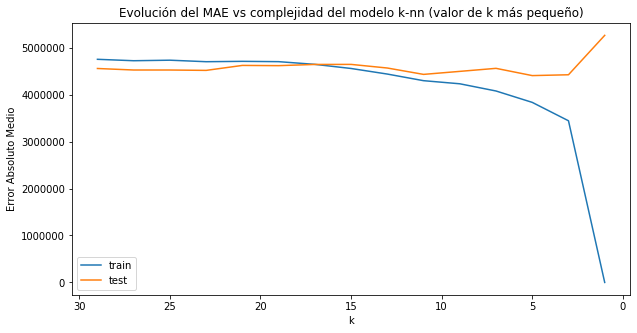

In [38]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, mae_train_vec)
plt.plot(k_vec, mae_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('Error Absoluto Medio')
plt.title('Evolución del MAE vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

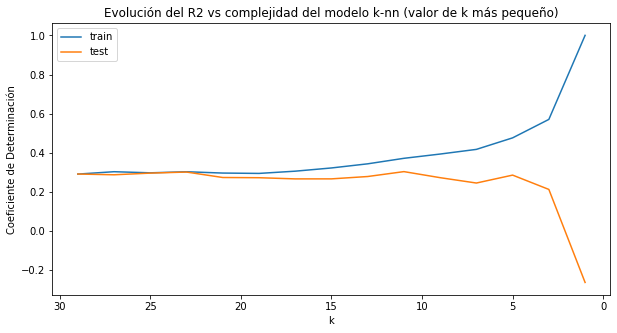

In [39]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, r2_train_vec)
plt.plot(k_vec, r2_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('Coeficiente de Determinación')
plt.title('Evolución del R2 vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

#### 3.2. Predicción con variables Forward Stepwise

In [49]:
x_train_filtered = x_train[current_variables_forward]
x_test_filtered = x_test[current_variables_forward]

In [50]:
mae_train_vec=[]
mae_test_vec=[]
r2_train_vec=[]
r2_test_vec=[]
y_pred_test_vec=[]
y_pred_train_vec=[]

for k in k_vec:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_filtered, y_train)
    y_pred = knn.predict(x_train_filtered)
    y_pred_train_vec.append(y_pred)
    mae_train_vec.append(mean_absolute_error(y_train, y_pred))
    r2_train_vec.append(r2_score(y_train, y_pred))
    y_pred = knn.predict(x_test_filtered)
    y_pred_test_vec.append(y_pred)
    mae_test_vec.append(mean_absolute_error(y_test, y_pred))
    r2_test_vec.append(r2_score(y_test, y_pred))
print(mae_train_vec)
print(r2_train_vec)
print(mae_test_vec)
print(r2_test_vec)
print(k_vec)

[0.0, 3484378.0825780467, 3801134.4628398786, 4007691.4592145015, 4222115.357166835, 4255379.271628674, 4416840.303276784, 4522661.456394763, 4654210.786209348, 4720765.474320241, 4704971.187886635, 4704949.935505058, 4721805.942598187, 4716789.970907464, 4746819.924992187]
[1.0, 0.5695826941887346, 0.48666633756820765, 0.4346273385513091, 0.39738734549078525, 0.3769816111027986, 0.34381227131435166, 0.3211152640700303, 0.30056424797199277, 0.291424462754038, 0.29950757852360765, 0.30263110784515423, 0.2989420192389449, 0.3018945298174027, 0.29216087218029674]
[5207393.979020979, 4721191.575757576, 4456416.66993007, 4444663.63036963, 4492940.041958042, 4448313.387158295, 4561382.992469069, 4593828.025174825, 4587131.528177705, 4621796.016194331, 4577314.418581419, 4512111.503496503, 4534858.013146854, 4538498.620564621, 4558056.387026767]
[-0.24892002625004284, 0.09633017018867507, 0.2625669119405709, 0.2809944890861894, 0.28008252450955384, 0.29475150800252714, 0.28547386085921367, 0.

In [51]:
mae_train_best = k_vec[np.where(mae_train_vec == np.amin(mae_train_vec))[0]]
r2_train_best = k_vec[np.where(r2_train_vec == np.amax(r2_train_vec))[0]]
mae_test_best = k_vec[np.where(mae_test_vec == np.amin(mae_test_vec))[0]]
r2_test_best = k_vec[np.where(r2_test_vec == np.amax(r2_test_vec))[0]]
print("Best K MAE (train):",mae_train_best)
print("Best K R2 (train):",r2_train_best)
print("Best K MAE(test):",mae_test_best,", value:",np.amin(mae_test_vec))
print("Best K R2 (test):",r2_test_best,", value:",np.amax(r2_test_vec))

best_k_y_pred = y_pred_test_vec[(np.where(r2_test_vec == np.amax(r2_test_vec))[0])[0]]

r2_aj = 1 - (1-r2_score(y_test, best_k_y_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)

print('Best K R2 adj (test): %.4f'%r2_aj)

Best K MAE (train): [1]
Best K R2 (train): [1]
Best K MAE(test): [7] , value: 4444663.63036963
Best K R2 (test): [23] , value: 0.3005069174192918
Best K R2 adj (test): 0.1437


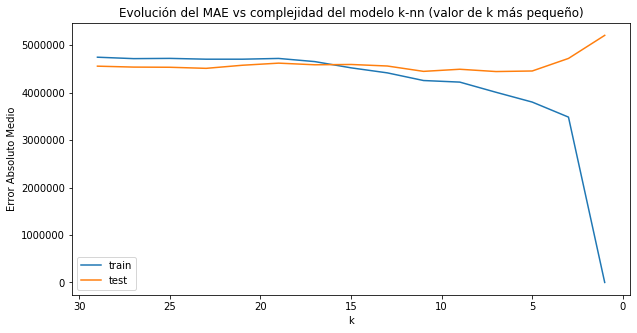

In [52]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, mae_train_vec)
plt.plot(k_vec, mae_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('Error Absoluto Medio')
plt.title('Evolución del MAE vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

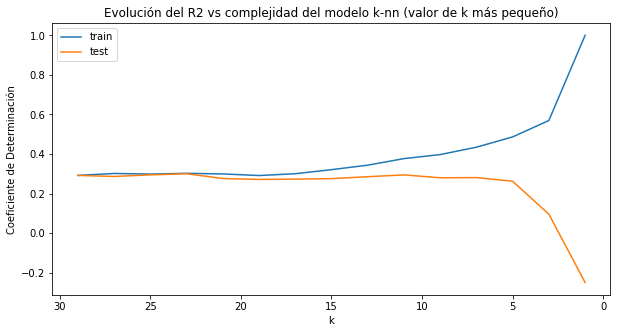

In [53]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, r2_train_vec)
plt.plot(k_vec, r2_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('Coeficiente de Determinación')
plt.title('Evolución del R2 vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

#### 3.2. Predicción con variables Backward Stepwise

In [54]:
x_train_filtered = x_train[current_variables_backward]
x_test_filtered = x_test[current_variables_backward]

In [55]:
mae_train_vec=[]
mae_test_vec=[]
r2_train_vec=[]
r2_test_vec=[]
y_pred_test_vec=[]
y_pred_train_vec=[]

for k in k_vec:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_filtered, y_train)
    y_pred = knn.predict(x_train_filtered)
    y_pred_train_vec.append(y_pred)
    mae_train_vec.append(mean_absolute_error(y_train, y_pred))
    r2_train_vec.append(r2_score(y_train, y_pred))
    y_pred = knn.predict(x_test_filtered)
    y_pred_test_vec.append(y_pred)
    mae_test_vec.append(mean_absolute_error(y_test, y_pred))
    r2_test_vec.append(r2_score(y_test, y_pred))
print(mae_train_vec)
print(r2_train_vec)
print(mae_test_vec)
print(r2_test_vec)
print(k_vec)

[0.0, 3465756.93856999, 3724241.486404834, 4041485.4911523513, 4210044.856998992, 4306671.423784674, 4433744.315826168, 4545344.636455186, 4658080.86991292, 4715902.2878041025, 4696405.807509711, 4702680.577827401, 4718042.223927492, 4723358.006713662, 4749053.3735805815]
[1.0, 0.5701802311185593, 0.48999158320743774, 0.4216379443959072, 0.39679732742990337, 0.3717841581117346, 0.3473254596849431, 0.32097497699605115, 0.30249345460031873, 0.2924170573536451, 0.30075769423444565, 0.30335369452887195, 0.2989472764030472, 0.3011590566339565, 0.291348125474714]
[5598996.951048951, 4570532.692307692, 4431855.047552447, 4490250.708291709, 4501291.9836829845, 4424920.462174189, 4571883.399139322, 4616262.173426573, 4606490.2274784045, 4594838.881486934, 4576765.939393939, 4516433.304043782, 4538178.66937063, 4533586.2419062415, 4558517.060284543]
[-0.35335853364460923, 0.15348839414232474, 0.25698197323353544, 0.27256664592080093, 0.27961873966544304, 0.30229861901754207, 0.27561875247147594,

In [56]:
mae_train_best = k_vec[np.where(mae_train_vec == np.amin(mae_train_vec))[0]]
r2_train_best = k_vec[np.where(r2_train_vec == np.amax(r2_train_vec))[0]]
mae_test_best = k_vec[np.where(mae_test_vec == np.amin(mae_test_vec))[0]]
r2_test_best = k_vec[np.where(r2_test_vec == np.amax(r2_test_vec))[0]]
print("Best K MAE (train):",mae_train_best)
print("Best K R2 (train):",r2_train_best)
print("Best K MAE(test):",mae_test_best,", value:",np.amin(mae_test_vec))
print("Best K R2 (test):",r2_test_best,", value:",np.amax(r2_test_vec))

best_k_y_pred = y_pred_test_vec[(np.where(r2_test_vec == np.amax(r2_test_vec))[0])[0]]

r2_aj = 1 - (1-r2_score(y_test, best_k_y_pred))*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)

print('Best K R2 adj (test): %.4f'%r2_aj)

Best K MAE (train): [1]
Best K R2 (train): [1]
Best K MAE(test): [11] , value: 4424920.462174189
Best K R2 (test): [11] , value: 0.30229861901754207
Best K R2 adj (test): 0.1459


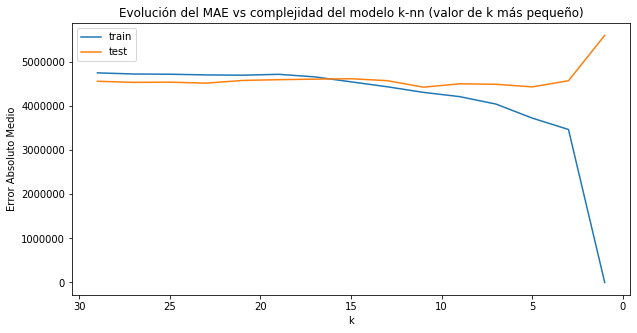

In [57]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, mae_train_vec)
plt.plot(k_vec, mae_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('Error Absoluto Medio')
plt.title('Evolución del MAE vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

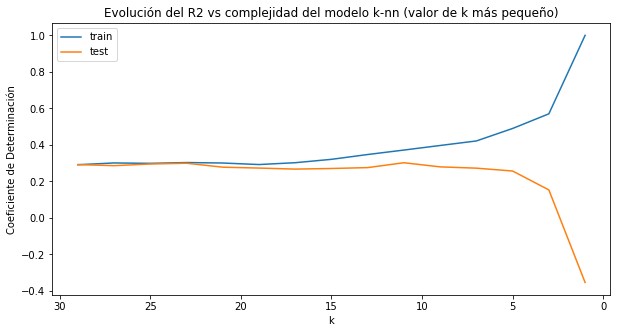

In [58]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, r2_train_vec)
plt.plot(k_vec, r2_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('Coeficiente de Determinación')
plt.title('Evolución del R2 vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

Dado que los modelos tienen diferente número de predictores, se compararán mediante el R2 ajustado.

En el primer caso, donde se usaron todas las variables independientes, el R2 ajustado fue de:

* R2 adj: 0.1479

En el segundo caso, donde se filtraron las variables predictoras por forward stepwise, el R2 ajustado fue de:

* R2 adj: 0.1437

En el tercer caso, donde se filtraron las variables predictoras por backward stepwise, el R2 ajustado fue de:

* R2 adj: 0.1459

Se puede observar que en el primer caso se obtuvieron las métricas, y por lo tanto, las mejores predicciones del modelo.

## Comparación de Modelos

* R2 ajustado Regresión Lineal: 0.4396

* R2 ajustado Redes Neuronales: 0.3981

* R2 ajustado K-Nearest Neighbors: 0.1479

Se observa que el modelo con mejor métrica es el de Regresión Lineal, y por ende, el que da las mejores predicciones.

# Maousekeherramientas para usar más adelante


In [107]:
# Filtrado
#data['FTr'].sort_values(ascending=False)

In [108]:
# Obtener registro por index
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
#data.iloc[163:164]

In [109]:
#Matriz de correlación
#pd.plotting.scatter_matrix(data.iloc[6:], figsize=(50,50))